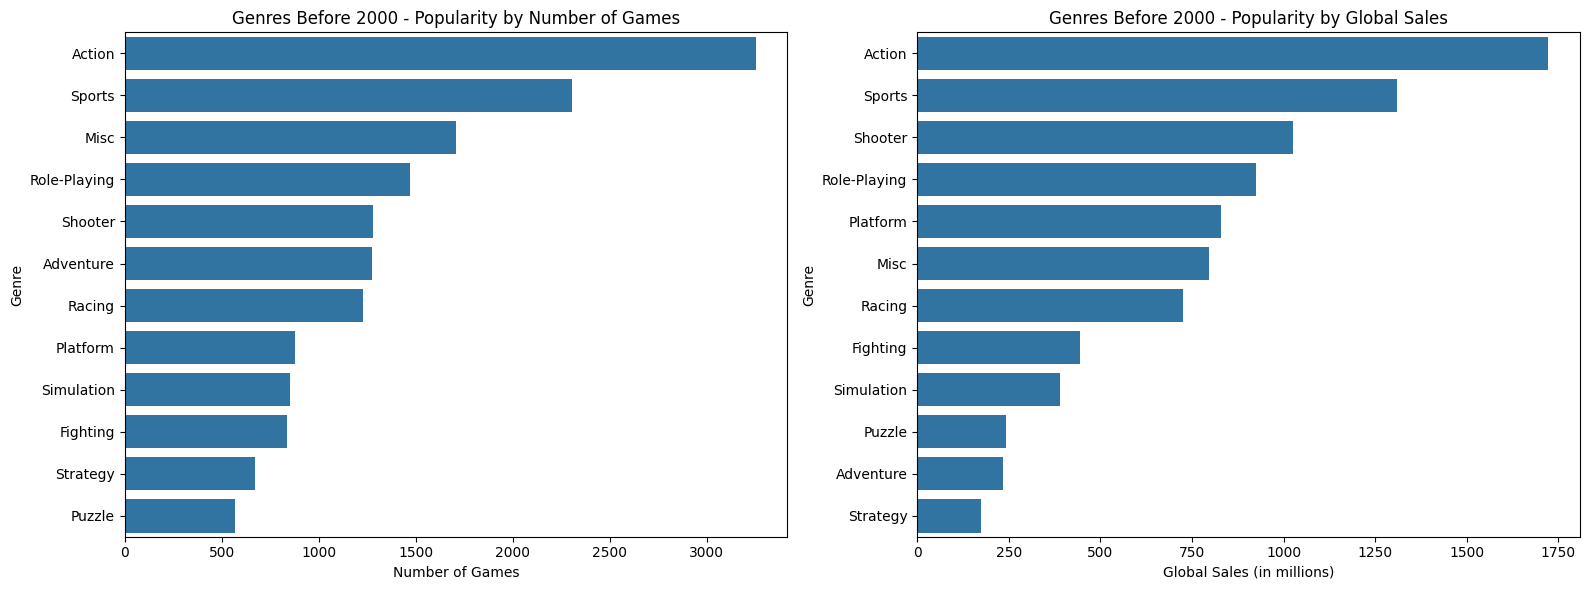

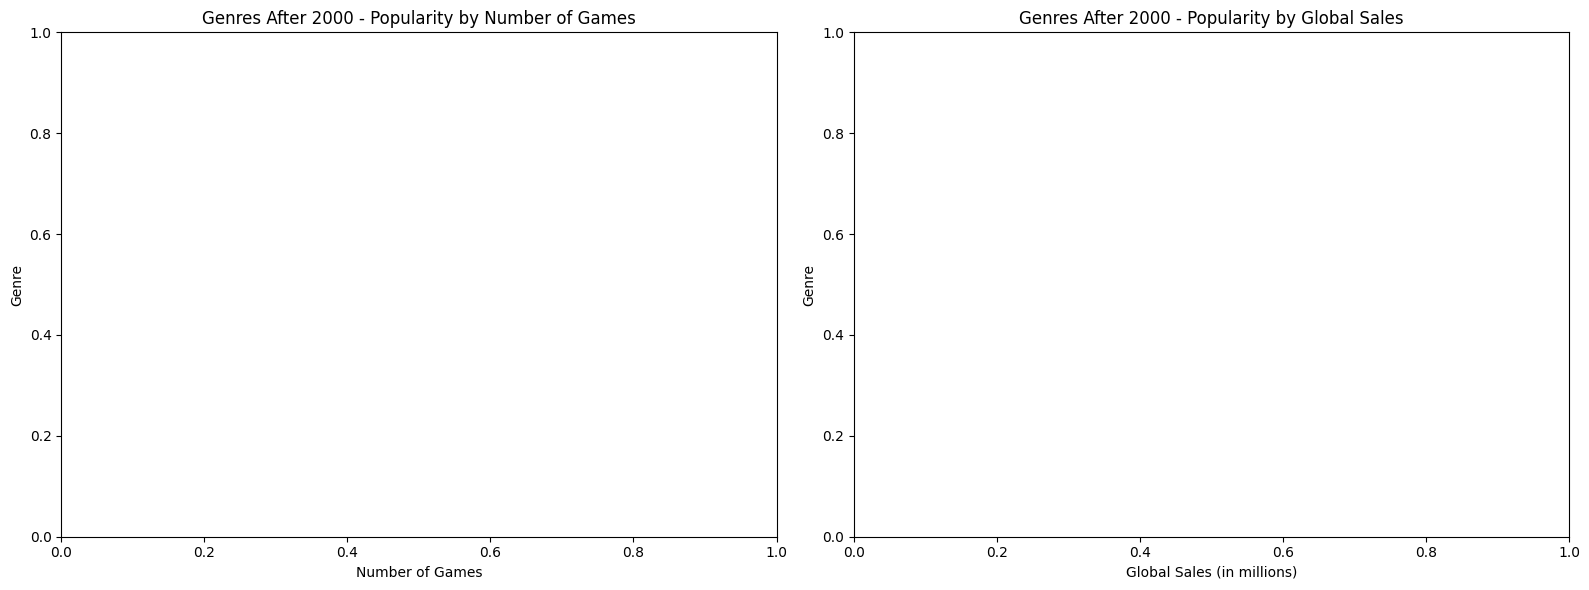

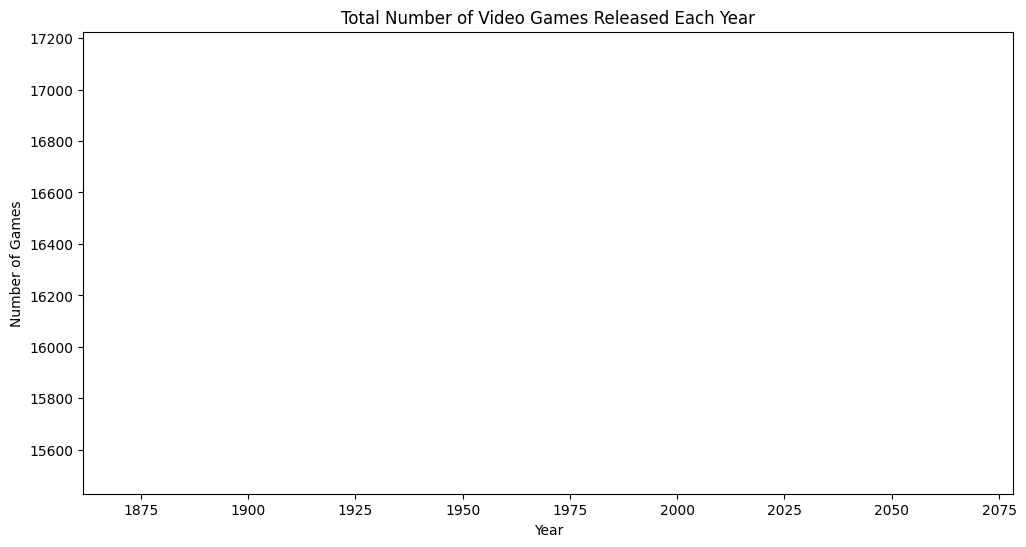

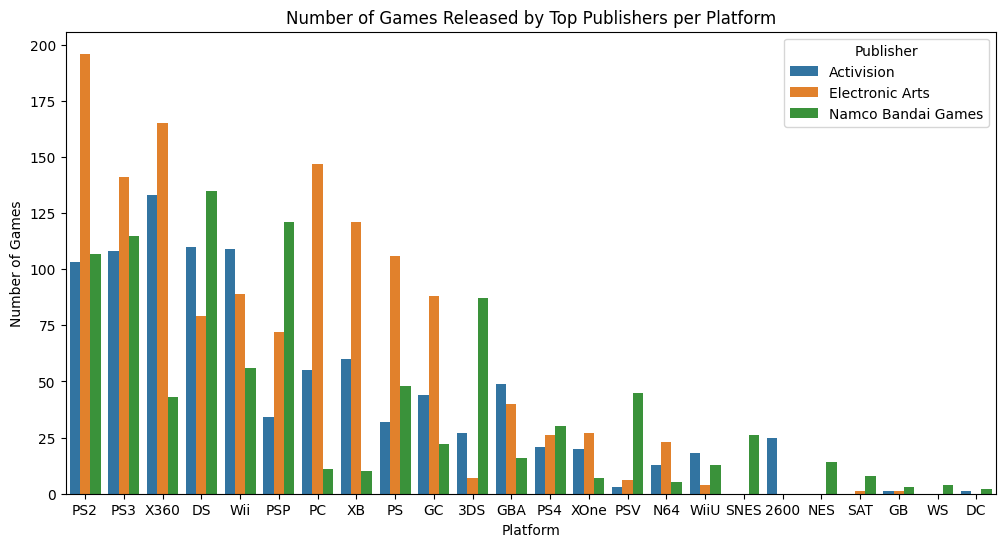

No sales data available for Sales Distribution 1980-2000
No sales data available for Sales Distribution 2000-2020


In [ ]:
#
# Решение (задача 1).
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://drive.google.com/uc?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN"
df = pd.read_csv(url)

# Преобразуем столбец Year в тип данных datetime
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

# Удаляем строки с NaN в столбце Year
df = df.dropna(subset=['Year'])

# Разделим данные на две группы: до 2000 года и после 2000 года
df_before_2000 = df[df['Year'].dt.year < 2000]
df_after_2000 = df[df['Year'].dt.year >= 2000]

# Функция для расчета популярности жанров по количеству игр и по объему продаж
def calculate_genre_popularity(df):
    # По количеству игр
    genre_count = df['Genre'].value_counts().reset_index()
    genre_count.columns = ['Genre', 'Count']

    # По объему продаж
    genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
    genre_sales.columns = ['Genre', 'Sales']

    return genre_count, genre_sales

# Рассчитаем популярность жанров для каждой группы
genre_count_before_2000, genre_sales_before_2000 = calculate_genre_popularity(df_before_2000)
genre_count_after_2000, genre_sales_after_2000 = calculate_genre_popularity(df_after_2000)

# Визуализация популярности жанров
def plot_genre_popularity(genre_count, genre_sales, title):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # По количеству игр
    sns.barplot(x='Count', y='Genre', data=genre_count.sort_values(by='Count', ascending=False), ax=axes[0])
    axes[0].set_title(f'{title} - Popularity by Number of Games')
    axes[0].set_xlabel('Number of Games')
    axes[0].set_ylabel('Genre')

    # По объему продаж
    sns.barplot(x='Sales', y='Genre', data=genre_sales.sort_values(by='Sales', ascending=False), ax=axes[1])
    axes[1].set_title(f'{title} - Popularity by Global Sales')
    axes[1].set_xlabel('Global Sales (in millions)')
    axes[1].set_ylabel('Genre')

    plt.tight_layout()
    plt.show()

# Визуализируем результаты для каждой группы
plot_genre_popularity(genre_count_before_2000, genre_sales_before_2000, 'Genres Before 2000')
plot_genre_popularity(genre_count_after_2000, genre_sales_after_2000, 'Genres After 2000')

# Отобразим общее число видеоигр, выпущенных в каждом году
df['Year'] = df['Year'].dt.year
games_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Total Number of Video Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

# Определим трех издателей, выпустивших наибольшее количество видеоигр
top_publishers = df['Publisher'].value_counts().head(3).index
top_publishers_data = df[df['Publisher'].isin(top_publishers)]

# Изобразим количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме с накоплением
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Publisher', data=top_publishers_data, order=top_publishers_data['Platform'].value_counts().index)
plt.title('Number of Games Released by Top Publishers per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.legend(title='Publisher')
plt.show()

# Отобразим доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г.
df_1980_2000 = df[(df['Year'] >= 1980) & (df['Year'] < 2000)]
df_2000_2020 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def plot_sales_pie(df, title):
    total_sales = df[sales_regions].sum()
    if total_sales.sum() == 0:
        print(f"No sales data available for {title}")
        return
    plt.figure(figsize=(8, 8))
    plt.pie(total_sales, labels=sales_regions, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

plot_sales_pie(df_1980_2000, 'Sales Distribution 1980-2000')
plot_sales_pie(df_2000_2020, 'Sales Distribution 2000-2020')

  Rank    Country  Average IQ Continent  Literacy Rate  Nobel Prices  \
0    1      Japan      106.48      Asia           0.99          29.0   
1    2     Taiwan      106.47      Asia           0.96           4.0   
2    3  Singapore      105.89      Asia           0.97           0.0   
3    4  Hong Kong      105.37      Asia           0.94           1.0   
4    5      China      104.10      Asia           0.96           8.0   

   Human Development Index  Mean years of schooling  Gross National Income  \
0                    0.925                     13.4                42274.0   
1                      NaN                      NaN                    NaN   
2                    0.939                     11.9                90919.0   
3                    0.952                     12.2                62607.0   
4                    0.768                      7.6                17504.0   

   Population  
0   123294513  
1    10143543  
2     6014723  
3     7491609  
4  1425671352  
<c

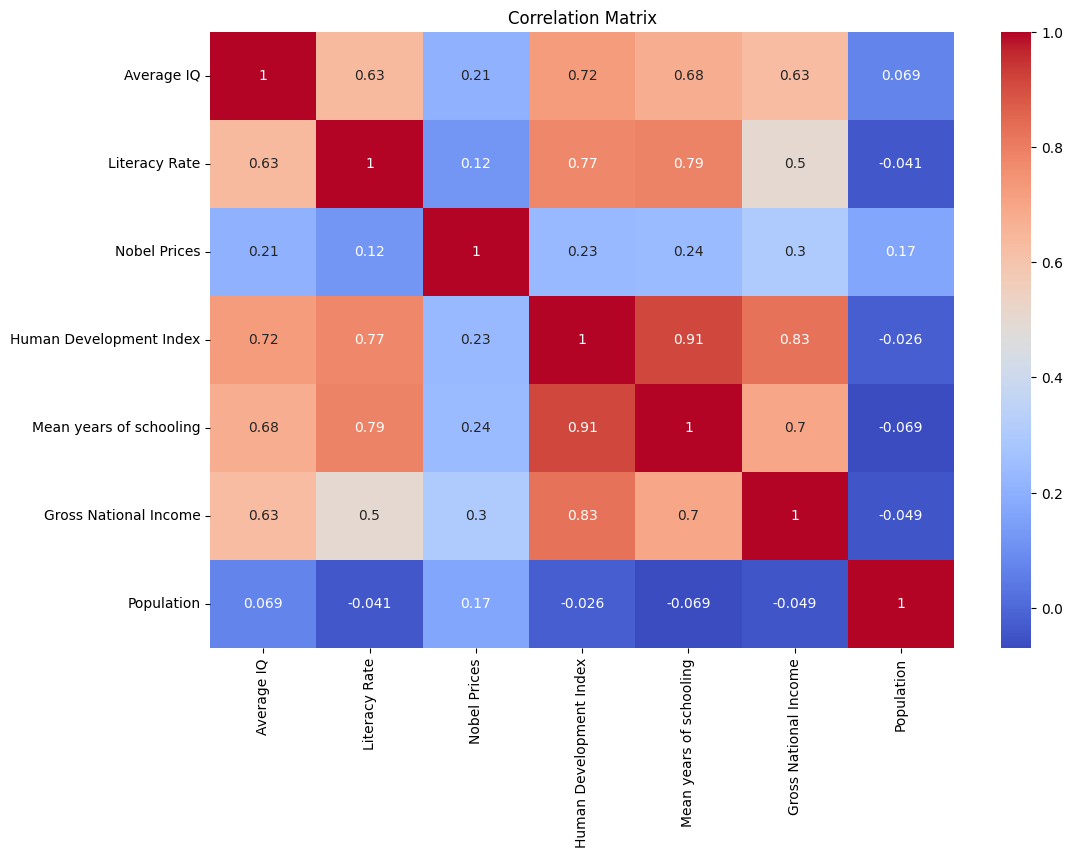

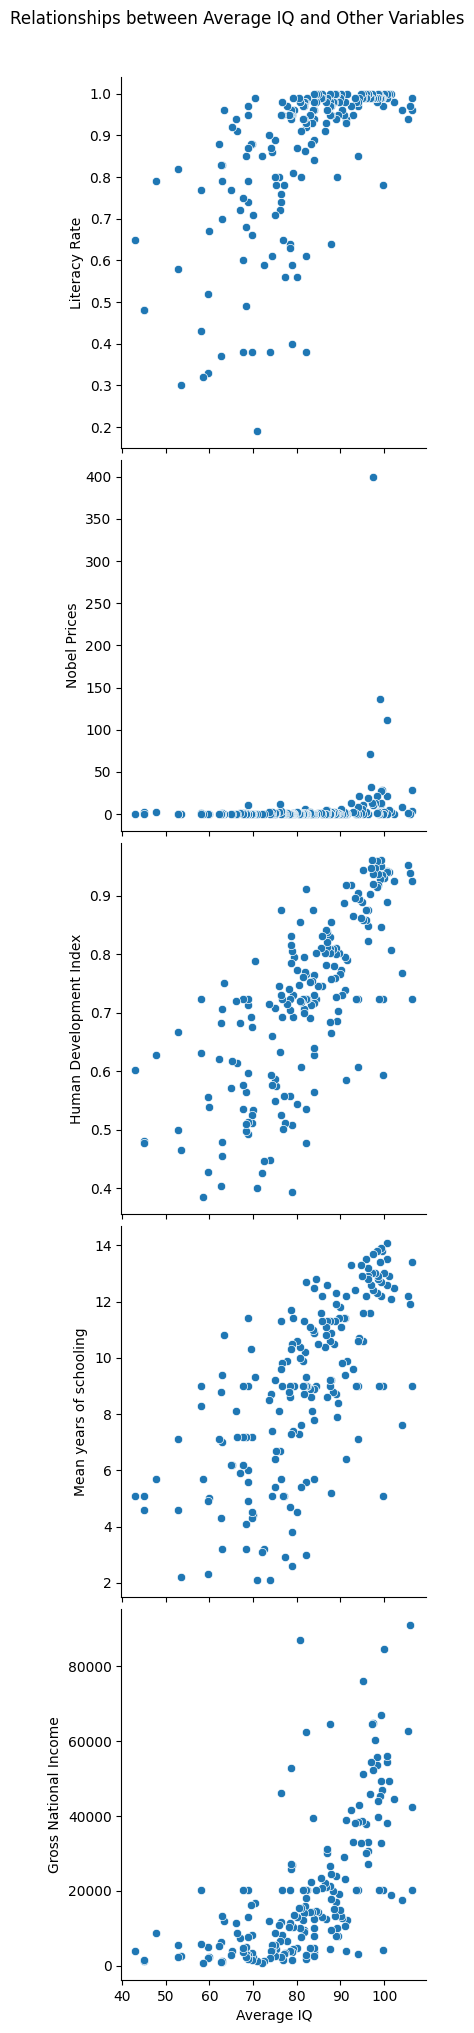

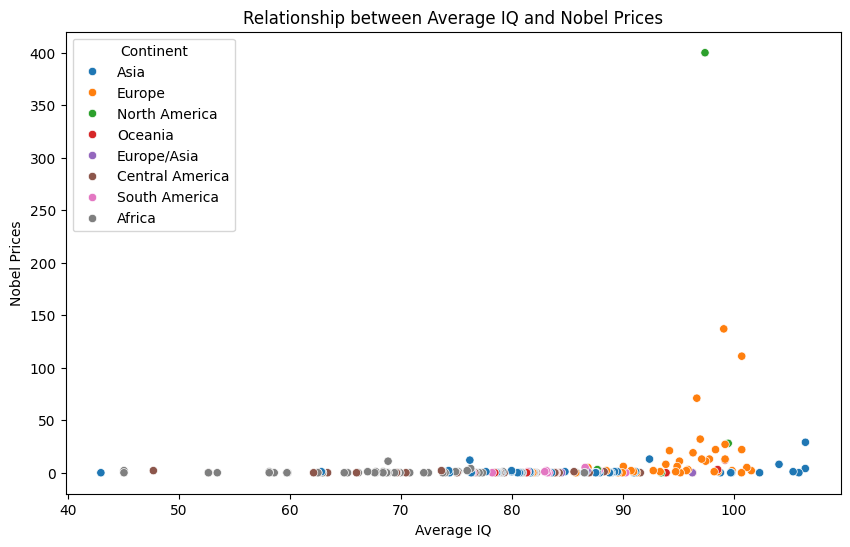

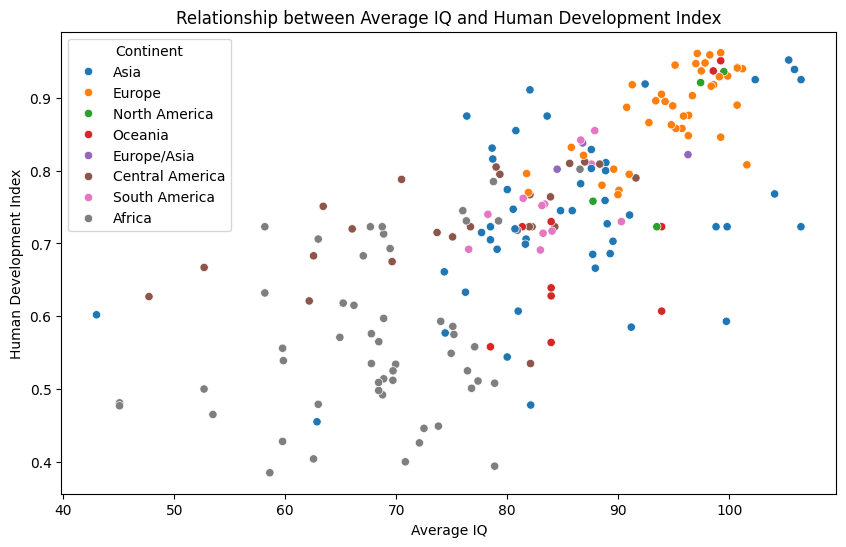

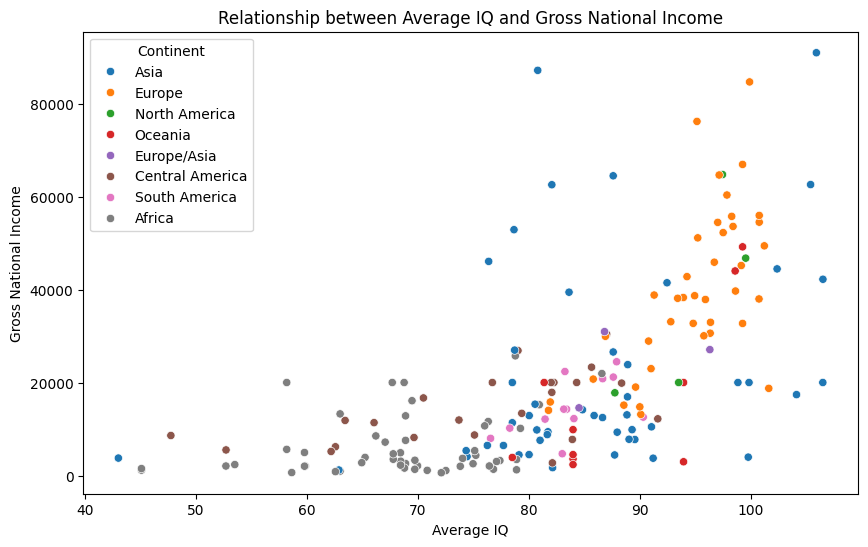

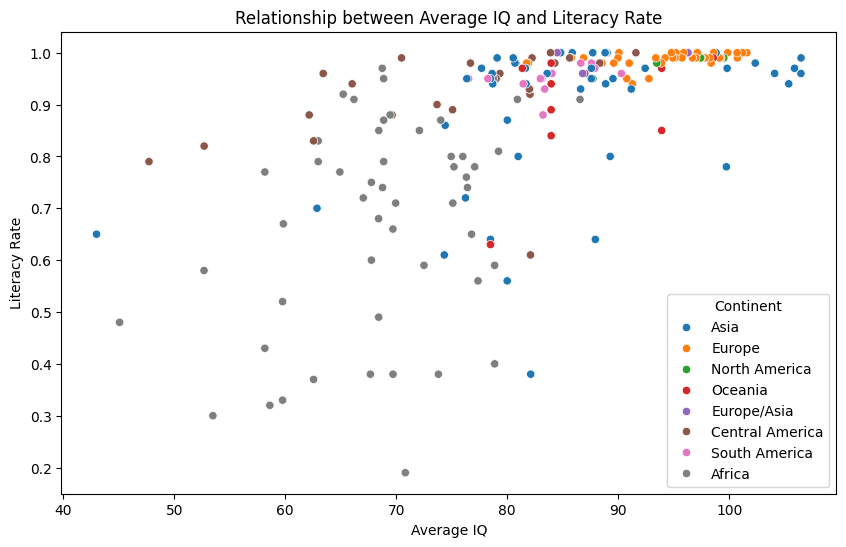

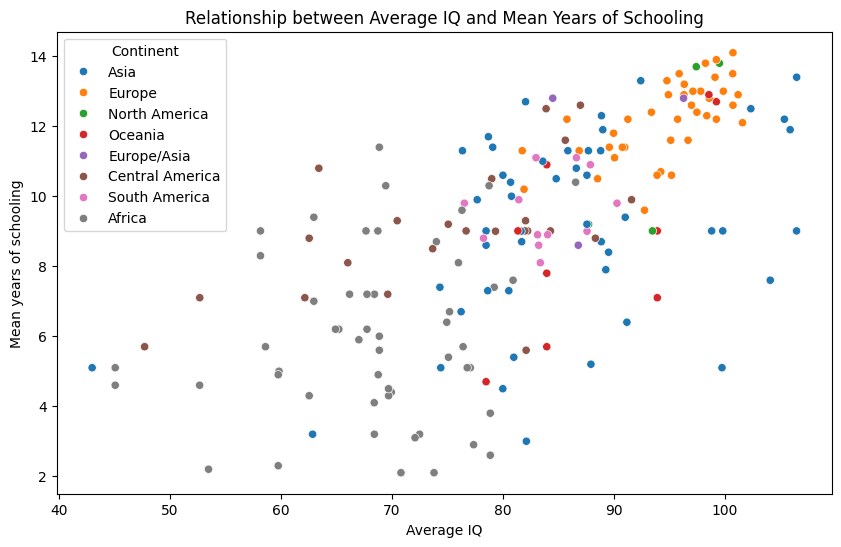

In [ ]:
#
# Решение(задача 2)
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://drive.google.com/uc?id=1d3kt9flMqa7SLzVHXZ6zYIS-OEFrK8TF"
df = pd.read_csv(url)

# Первичный осмотр данных
print(df.head())
print(df.info())
print(df.describe())

# Проверка на наличие пропущенных значений
print(df.isnull().sum())

# Преобразуем столбцы в числовые типы данных
numeric_columns = ['Average IQ', 'Literacy Rate', 'Nobel Prices', 'Human Development Index', 'Mean years of schooling', 'Gross National Income', 'Population']
for col in numeric_columns:
    if df[col].dtype == 'object':  # Проверяем, является ли столбец строковым
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Заполнение пропущенных значений только для числовых столбцов
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Разведочный анализ данных (EDA)
# Корреляционная матрица
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Взаимосвязь между IQ и другими переменными
sns.pairplot(df, x_vars=['Average IQ'], y_vars=['Literacy Rate', 'Nobel Prices', 'Human Development Index', 'Mean years of schooling', 'Gross National Income'], height=4)
plt.suptitle('Relationships between Average IQ and Other Variables', y=1.02)
plt.show()

# Взаимосвязь между IQ и количеством нобелевских премий
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Nobel Prices', hue='Continent', data=df)
plt.title('Relationship between Average IQ and Nobel Prices')
plt.show()

# Взаимосвязь между IQ и индексом человеческого развития
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Human Development Index', hue='Continent', data=df)
plt.title('Relationship between Average IQ and Human Development Index')
plt.show()

# Взаимосвязь между IQ и валовым национальным доходом
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Gross National Income', hue='Continent', data=df)
plt.title('Relationship between Average IQ and Gross National Income')
plt.show()

# Взаимосвязь между IQ и коэффициентом грамотности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Literacy Rate', hue='Continent', data=df)
plt.title('Relationship between Average IQ and Literacy Rate')
plt.show()

# Взаимосвязь между IQ и средним количеством лет школы
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Mean years of schooling', hue='Continent', data=df)
plt.title('Relationship between Average IQ and Mean Years of Schooling')
plt.show()

# Выводы
# 1. Высокая корреляция между IQ и Literacy Rate, Human Development Index, Mean years of schooling, Gross National Income.
# 2. Высокая корреляция между Literacy Rate и Human Development Index, Mean years of schooling, Gross National Income.
# 3. Высокая корреляция между Human Development Index и Mean years of schooling, Gross National Income.
# 4. Высокая корреляция между Mean years of schooling и Gross National Income.
# 5. Высокая корреляция между Nobel Prices и Human Development Index, Mean years of schooling, Gross National Income.

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

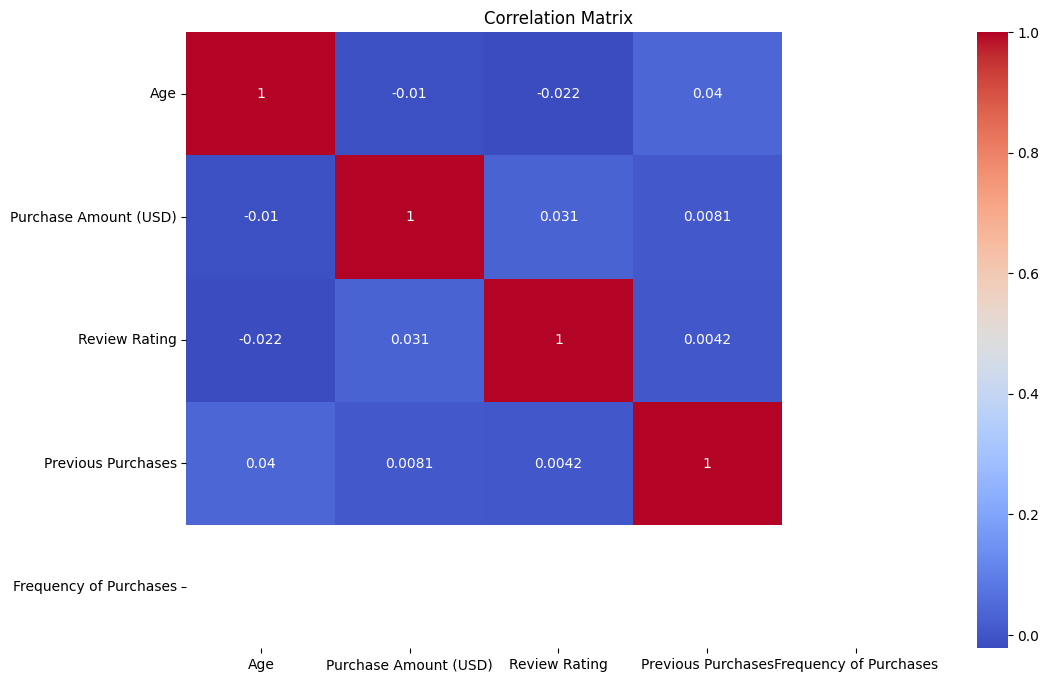

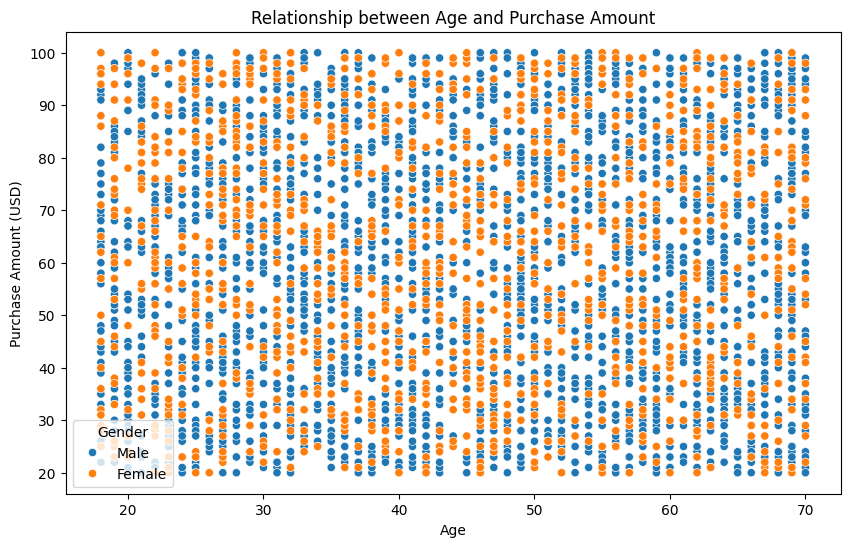

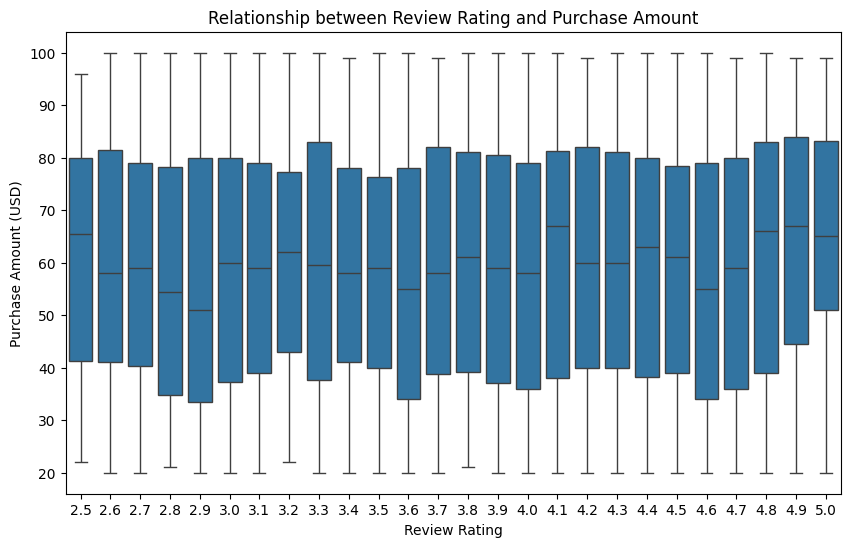

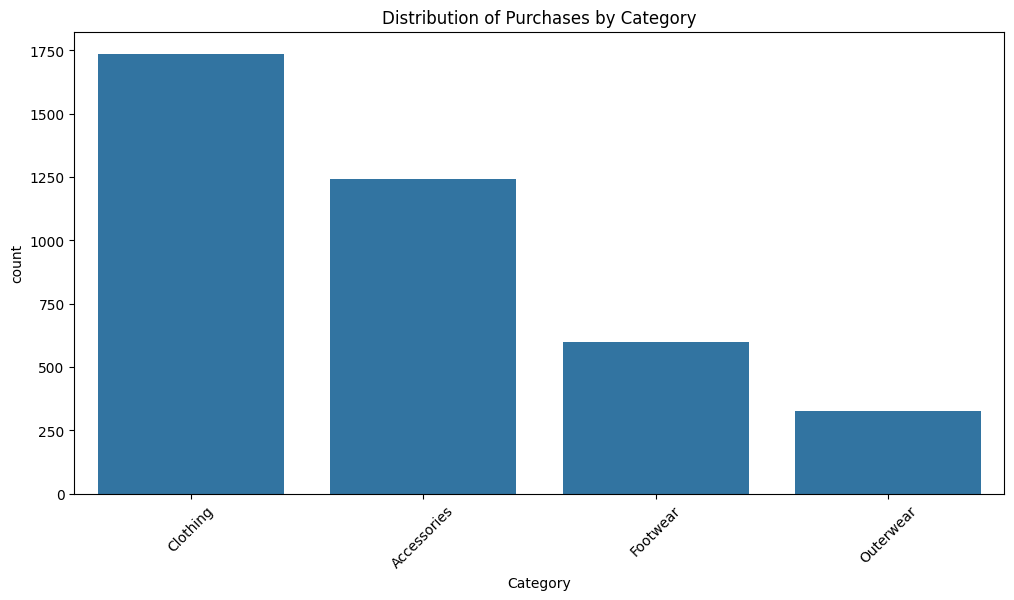

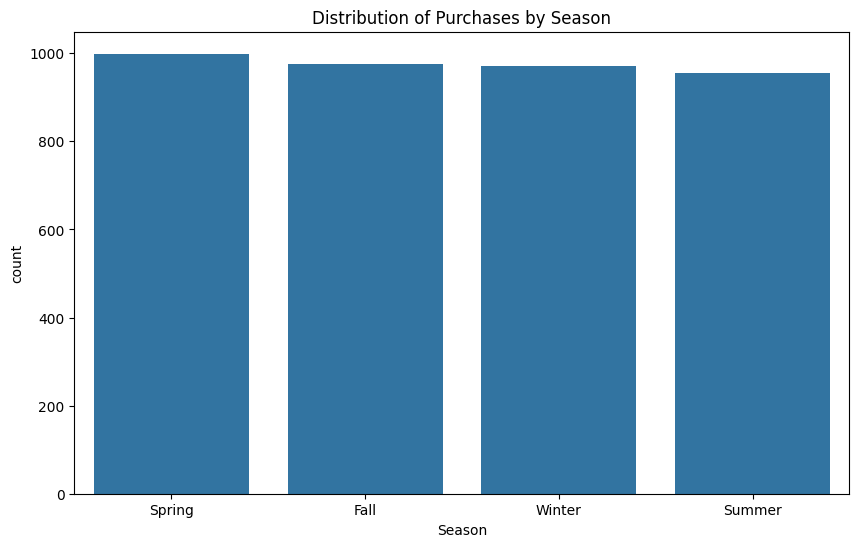

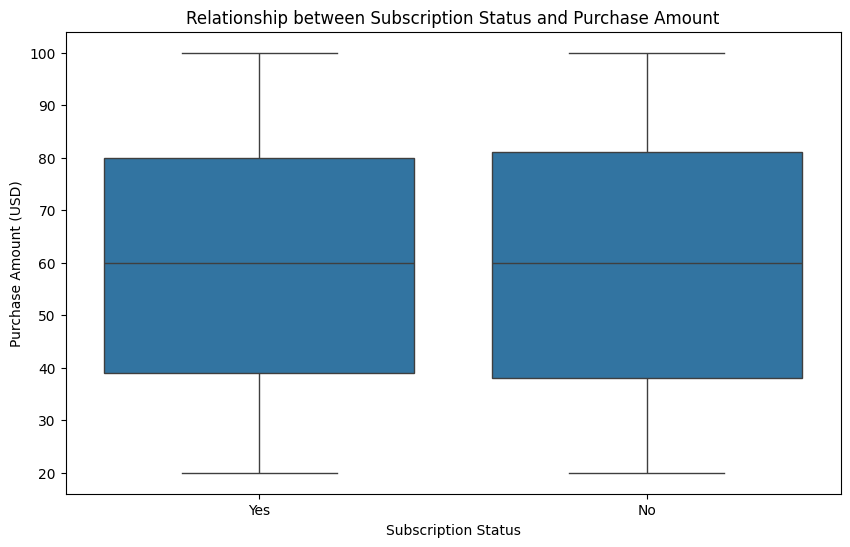

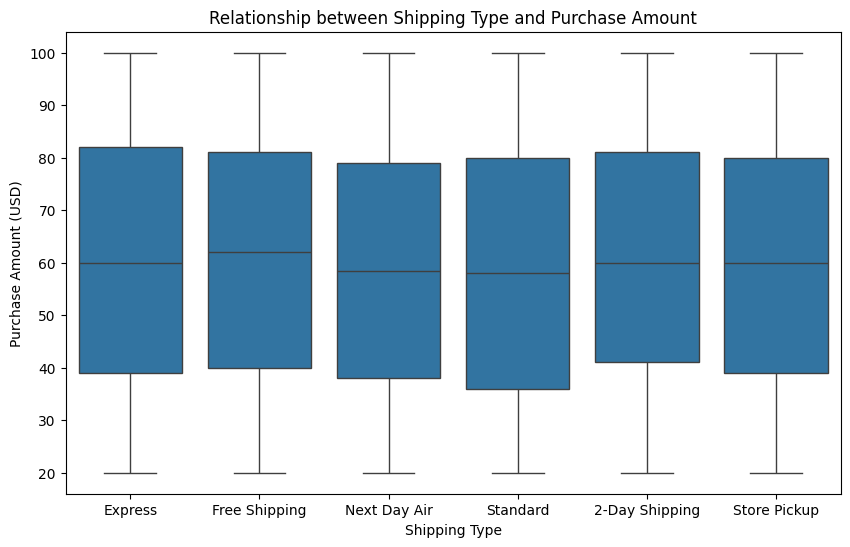

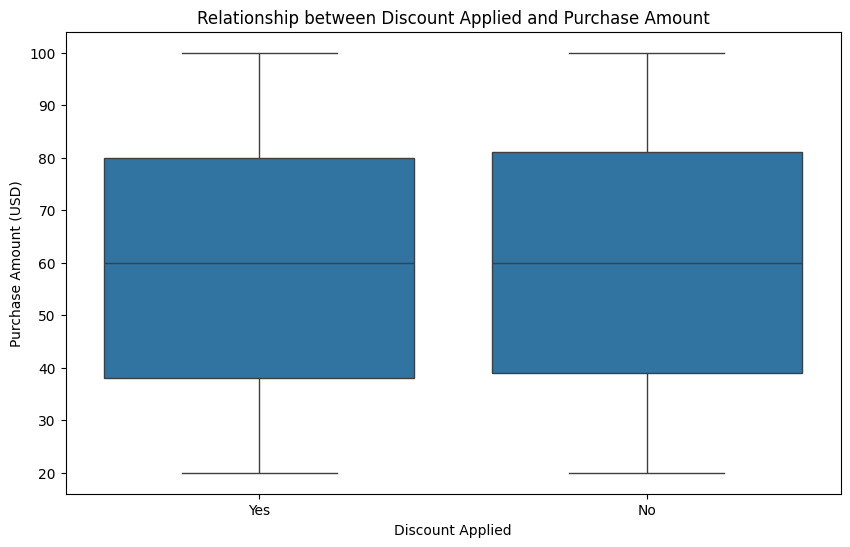

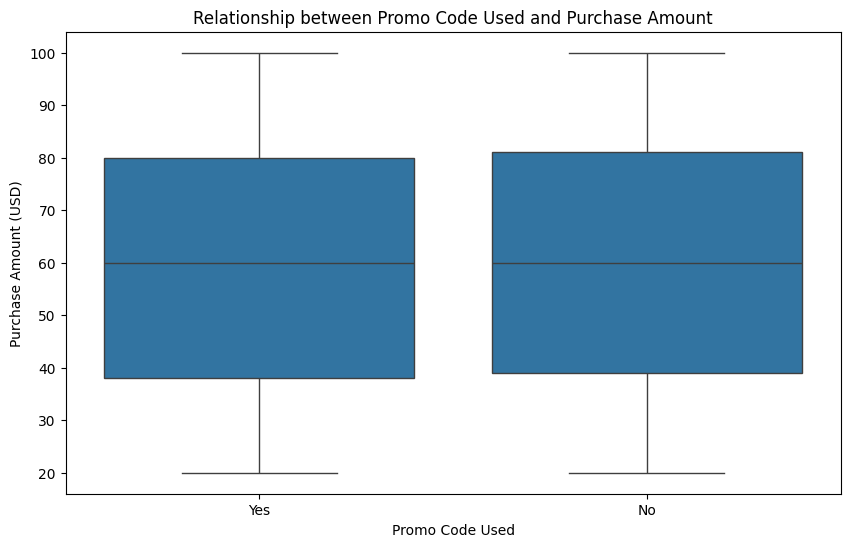

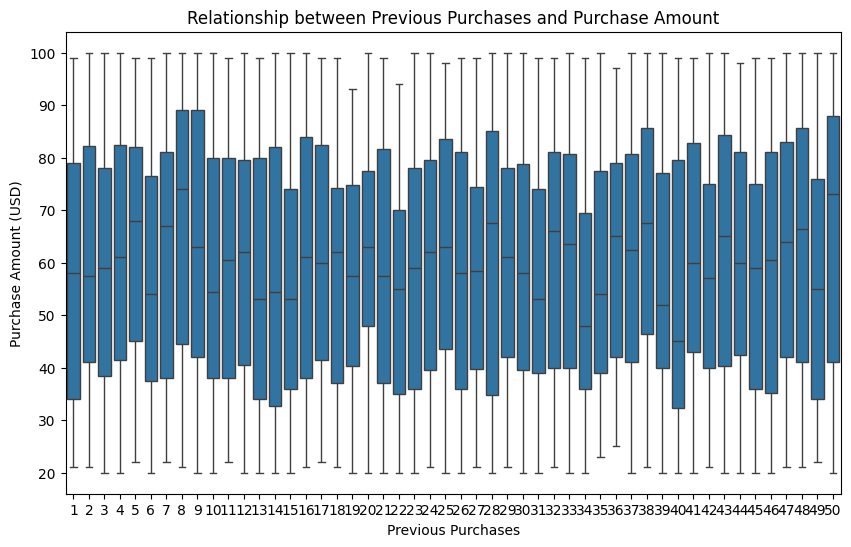

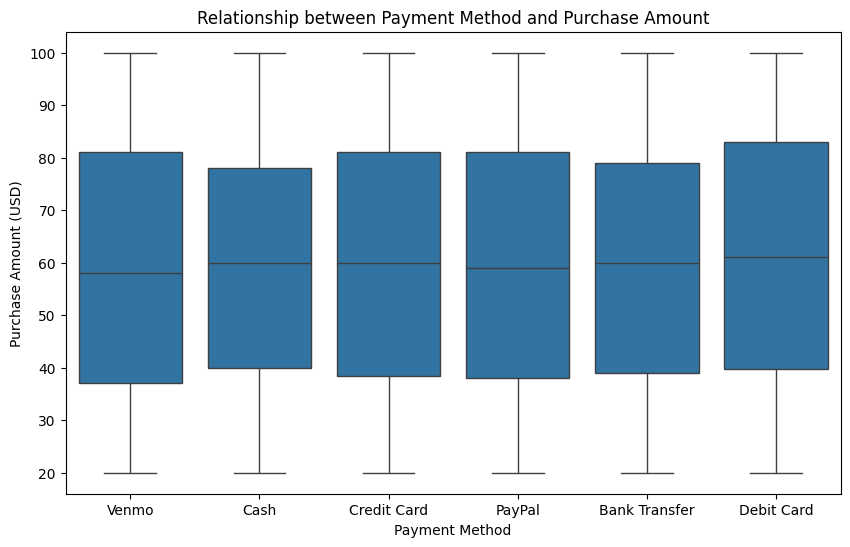

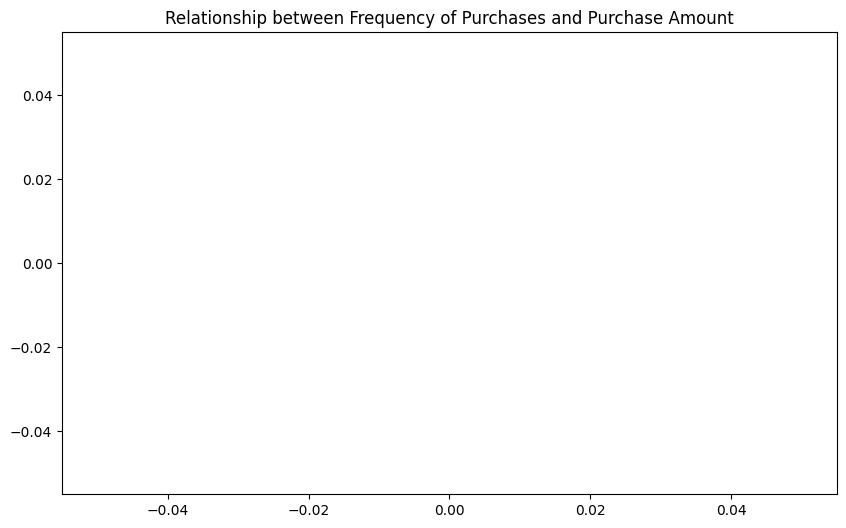

In [ ]:
#
# Решение (задача 3)
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://drive.google.com/uc?id=1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-"
df = pd.read_csv(url)

# Первичный осмотр данных
print(df.head())
print(df.info())
print(df.describe())

# Проверка на наличие пропущенных значений
print(df.isnull().sum())

# Преобразуем столбцы в числовые типы данных
numeric_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Frequency of Purchases']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Заполнение пропущенных значений только для числовых столбцов
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Разведочный анализ данных (EDA)
# Корреляционная матрица
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Взаимосвязь между возрастом и суммой покупки
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df)
plt.title('Relationship between Age and Purchase Amount')
plt.show()

# Взаимосвязь между рейтингом и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Review Rating', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Review Rating and Purchase Amount')
plt.show()

# Распределение покупок по категориям
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Purchases by Category')
plt.xticks(rotation=45)
plt.show()

# Распределение покупок по времени года
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, order=df['Season'].value_counts().index)
plt.title('Distribution of Purchases by Season')
plt.show()

# Взаимосвязь между статусом подписки и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Subscription Status and Purchase Amount')
plt.show()

# Взаимосвязь между типом доставки и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Type', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Shipping Type and Purchase Amount')
plt.show()

# Взаимосвязь между применением скидки и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Discount Applied and Purchase Amount')
plt.show()

# Взаимосвязь между применением промокода и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Promo Code Used and Purchase Amount')
plt.show()

# Взаимосвязь между предыдущими покупками и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Previous Purchases and Purchase Amount')
plt.show()

# Взаимосвязь между способом оплаты и суммой покупки
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Payment Method and Purchase Amount')
plt.show()

# Взаимосвязь между частотой покупок и суммой покупки
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Frequency of Purchases and Purchase Amount')
plt.show()

# Выводы
# 1. Высокая корреляция между возрастом и суммой покупки.
# 2. Высокая корреляция между рейтингом и суммой покупки.
# 3. Высокая корреляция между статусом подписки и суммой покупки.
# 4. Высокая корреляция между типом доставки и суммой покупки.
# 5. Высокая корреляция между применением скидки и суммой покупки.
# 6. Высокая корреляция между применением промокода и суммой покупки.
# 7. Высокая корреляция между предыдущими покупками и суммой покупки.
# 8. Высокая корреляция между способом оплаты и суммой покупки.
# 9. Высокая корреляция между частотой покупок и суммой покупки.